## **Pré-Processamento dos dados pós append `matches_teams_stats.csv`**

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("C:/Users/gabri/OneDrive/Documents/Faculdade/2024.2/Projeto de Ciência de Dados/novo/volleyball-case-study/data/para-o-projeto/team_v_team.csv")
df.head()

,Unnamed: 0,Date,TeamA,TeamB,Result,S,Team A Kills,Team A Errors,Team A Total Attacks,Team A Hit Pct,...,Team B Hit Pct,Team B Assists,Team B Aces,Team B SErr,Team B Digs,Team B RErr,Team B Block Solos,Team B Block Assists,Team B BErr,Team B PTS
0,0,8302019,USC Upstate,Virginia Tech,0,4.0,33,21,112,0.107,...,0.234,48,13,12,51,4,4,20,2,0.0
1,1,8302019,USC Upstate,Northwestern,0,3.0,16,24,89,-0.090,...,0.349,41,6,7,42,1,2,20,0,0.0
2,2,9072019,USC Upstate,Ga. Southern,0,3.0,37,20,117,0.145,...,0.239,39,4,5,49,2,1,6,1,50.0
3,3,9132019,USC Upstate,Norfolk St.,1,5.0,50,27,164,0.140,...,0.114,47,11,15,67,9,1,17,1,70.5
4,4,9142019,USC Upstate,George Washington,0,3.0,30,17,112,0.116,...,0.216,44,3,1,60,2,1,6,6,52.0


### **Trocando coluna Date para Datetime**

In [36]:
def format_date(date):
    date_str = str(date)  # Converte o inteiro para string
    if len(date_str) == 7:  # Caso a data tenha 7 caracteres (mês ou dia com um único dígito)
        return pd.to_datetime(date_str, format='%m%d%Y')
    else:
        return pd.to_datetime(date_str, format='%m%d%Y')

# Aplicar a função de formatação às datas
df['Date'] = df['Date'].apply(format_date)

### **Valores Nulos e Tratamento**

In [37]:
df.isna().sum()

Unnamed: 0                  0
Date                        0
TeamA                       0
TeamB                       0
Result                      0
S_x                         0
Team A Kills                0
Team A Errors               0
Team A Total Attacks        0
Team A Hit Pct              0
Team A Assists              0
Team A Aces                 0
Team A SErr                 0
Team A Digs                 0
Team A RErr                 0
Team A Block Solos          0
Team A Block Assists        0
Team A BErr                 0
Team A PTS                  0
Team B Kills                0
Team B Errors               0
Team B Total Attacks        0
Team B Hit Pct              0
Team B Assists              0
Team B Aces                 0
Team B SErr                 0
Team B Digs                 0
Team B RErr                 0
Team B Block Solos          0
Team B Block Assists        0
Team B BErr                 0
Team B PTS                  0
S_y                     10133
MP        

In [38]:
df = df.dropna(subset=['MP'])
df.isna().sum()

Unnamed: 0                  0
Date                        0
TeamA                       0
TeamB                       0
Result                      0
S_x                         0
Team A Kills                0
Team A Errors               0
Team A Total Attacks        0
Team A Hit Pct              0
Team A Assists              0
Team A Aces                 0
Team A SErr                 0
Team A Digs                 0
Team A RErr                 0
Team A Block Solos          0
Team A Block Assists        0
Team A BErr                 0
Team A PTS                  0
Team B Kills                0
Team B Errors               0
Team B Total Attacks        0
Team B Hit Pct              0
Team B Assists              0
Team B Aces                 0
Team B SErr                 0
Team B Digs                 0
Team B RErr                 0
Team B Block Solos          0
Team B Block Assists        0
Team B BErr                 0
Team B PTS                  0
S_y                         0
MP        

### **Removendo Colunas Nulas e colunas do Time B**
Como nosso dataset repete as partidas hora colocando um time na posição de time A e outrohora colocando-o como time B para a mesma partida, decidimos tirar todas as colunas do time B como forma de evitar esses valores duplicados

In [39]:
columns_to_drop = ['MS','MP.1','Attend','Unnamed: 0','TeamB','Team B Kills','Team B Errors','Team B Total Attacks','Team B Hit Pct','Team B Assists','Team B Aces','Team B SErr','Team B Digs','Team B RErr','Team B Block Solos','Team B Block Assists','Team B BErr','Team B PTS']
df=df.drop(columns = columns_to_drop)
df

,Date,TeamA,Result,S_x,Team A Kills,Team A Errors,Team A Total Attacks,Team A Hit Pct,Team A Assists,Team A Aces,...,Aces,SErr,Digs,RErr,Block Solos,Block Assists,BErr,PTS,BHE,Trpl Dbl
0,2019-08-30,USC Upstate,0,4.0,33,21,112,0.107,30,4,...,139.25,187.00,1820.5,174.25,52.50,338.75,44.5,1679.875,22.25,18.0
1,2019-08-30,USC Upstate,0,3.0,16,24,89,-0.090,15,1,...,139.25,187.00,1820.5,174.25,52.50,338.75,44.5,1679.875,22.25,18.0
2,2019-09-07,USC Upstate,0,3.0,37,20,117,0.145,35,2,...,139.25,187.00,1820.5,174.25,52.50,338.75,44.5,1679.875,22.25,18.0
3,2019-09-13,USC Upstate,1,5.0,50,27,164,0.140,47,9,...,139.25,187.00,1820.5,174.25,52.50,338.75,44.5,1679.875,22.25,18.0
4,2019-09-14,USC Upstate,0,3.0,30,17,112,0.116,30,2,...,139.25,187.00,1820.5,174.25,52.50,338.75,44.5,1679.875,22.25,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37645,2016-11-01,Elon,1,3.0,52,14,106,0.358,50,4,...,146.25,181.25,1862.0,148.00,42.75,381.00,51.5,1896.000,51.25,12.0
37646,2016-11-05,Elon,0,3.0,39,21,125,0.144,35,7,...,146.25,181.25,1862.0,148.00,42.75,381.00,51.5,1896.000,51.25,12.0
37647,2016-11-07,Elon,0,3.0,44,28,131,0.122,40,1,...,146.25,181.25,1862.0,148.00,42.75,381.00,51.5,1896.000,51.25,12.0
37648,2016-11-11,Elon,0,5.0,49,37,156,0.077,45,4,...,146.25,181.25,1862.0,148.00,42.75,381.00,51.5,1896.000,51.25,12.0


In [40]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['TeamA_numeric'] = label_encoder.fit_transform(df['TeamA'])
df

,Date,TeamA,Result,S_x,Team A Kills,Team A Errors,Team A Total Attacks,Team A Hit Pct,Team A Assists,Team A Aces,...,SErr,Digs,RErr,Block Solos,Block Assists,BErr,PTS,BHE,Trpl Dbl,TeamA_numeric
0,2019-08-30,USC Upstate,0,4.0,33,21,112,0.107,30,4,...,187.00,1820.5,174.25,52.50,338.75,44.5,1679.875,22.25,18.0,220
1,2019-08-30,USC Upstate,0,3.0,16,24,89,-0.090,15,1,...,187.00,1820.5,174.25,52.50,338.75,44.5,1679.875,22.25,18.0,220
2,2019-09-07,USC Upstate,0,3.0,37,20,117,0.145,35,2,...,187.00,1820.5,174.25,52.50,338.75,44.5,1679.875,22.25,18.0,220
3,2019-09-13,USC Upstate,1,5.0,50,27,164,0.140,47,9,...,187.00,1820.5,174.25,52.50,338.75,44.5,1679.875,22.25,18.0,220
4,2019-09-14,USC Upstate,0,3.0,30,17,112,0.116,30,2,...,187.00,1820.5,174.25,52.50,338.75,44.5,1679.875,22.25,18.0,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37645,2016-11-01,Elon,1,3.0,52,14,106,0.358,50,4,...,181.25,1862.0,148.00,42.75,381.00,51.5,1896.000,51.25,12.0,54
37646,2016-11-05,Elon,0,3.0,39,21,125,0.144,35,7,...,181.25,1862.0,148.00,42.75,381.00,51.5,1896.000,51.25,12.0,54
37647,2016-11-07,Elon,0,3.0,44,28,131,0.122,40,1,...,181.25,1862.0,148.00,42.75,381.00,51.5,1896.000,51.25,12.0,54
37648,2016-11-11,Elon,0,5.0,49,37,156,0.077,45,4,...,181.25,1862.0,148.00,42.75,381.00,51.5,1896.000,51.25,12.0,54


In [41]:
df.to_csv('dados_processados_sem_normalizar.csv', index=False)

### **Normalização dos dados**

In [42]:
colunas_para_normalizar = [
     'Result', 'S_x', 'Team A Kills', 'Team A Errors',
    'Team A Total Attacks', 'Team A Hit Pct', 'Team A Assists',
    'Team A Aces', 'Team A SErr', 'Team A Digs', 'Team A RErr',
    'Team A Block Solos', 'Team A Block Assists', 'Team A BErr',
    'Team A PTS', 'Trpl Dbl', 'BHE'
]

scaler = MinMaxScaler()
df_normalizado = df
df_normalizado[colunas_para_normalizar] = scaler.fit_transform(df_normalizado[colunas_para_normalizar])
df_normalizado

,Date,TeamA,Result,S_x,Team A Kills,Team A Errors,Team A Total Attacks,Team A Hit Pct,Team A Assists,Team A Aces,...,SErr,Digs,RErr,Block Solos,Block Assists,BErr,PTS,BHE,Trpl Dbl,TeamA_numeric
0,2019-08-30,USC Upstate,0.0,0.8,0.379310,0.42,0.414815,0.321295,0.361446,0.20,...,187.00,1820.5,174.25,52.50,338.75,44.5,1679.875,0.163142,0.516129,220
1,2019-08-30,USC Upstate,0.0,0.6,0.183908,0.48,0.329630,0.075965,0.180723,0.05,...,187.00,1820.5,174.25,52.50,338.75,44.5,1679.875,0.163142,0.516129,220
2,2019-09-07,USC Upstate,0.0,0.6,0.425287,0.40,0.433333,0.368618,0.421687,0.10,...,187.00,1820.5,174.25,52.50,338.75,44.5,1679.875,0.163142,0.516129,220
3,2019-09-13,USC Upstate,1.0,1.0,0.574713,0.54,0.607407,0.362391,0.566265,0.45,...,187.00,1820.5,174.25,52.50,338.75,44.5,1679.875,0.163142,0.516129,220
4,2019-09-14,USC Upstate,0.0,0.6,0.344828,0.34,0.414815,0.332503,0.361446,0.10,...,187.00,1820.5,174.25,52.50,338.75,44.5,1679.875,0.163142,0.516129,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37645,2016-11-01,Elon,1.0,0.6,0.597701,0.28,0.392593,0.633873,0.602410,0.20,...,181.25,1862.0,148.00,42.75,381.00,51.5,1896.000,0.513595,0.322581,54
37646,2016-11-05,Elon,0.0,0.6,0.448276,0.42,0.462963,0.367372,0.421687,0.35,...,181.25,1862.0,148.00,42.75,381.00,51.5,1896.000,0.513595,0.322581,54
37647,2016-11-07,Elon,0.0,0.6,0.505747,0.56,0.485185,0.339975,0.481928,0.05,...,181.25,1862.0,148.00,42.75,381.00,51.5,1896.000,0.513595,0.322581,54
37648,2016-11-11,Elon,0.0,1.0,0.563218,0.74,0.577778,0.283935,0.542169,0.20,...,181.25,1862.0,148.00,42.75,381.00,51.5,1896.000,0.513595,0.322581,54


In [43]:
df.to_csv('dados_processados.csv', index=False)

## **Pré-Processamento Pós EDA**
* Conversando com a Fernanda percebemos que nossa análise é sobre a partida então features de estatísticas gerais dos times não ou pouco importariam para o nosso clustering.
* Outra questão que percebemos também é que existem features do Time B que podem dizer comportamentos do time A (um time B com muitos erros pode indicar também um time A com alta Hit Pct). Então decidimos voltar atrás na retirada das colunas do time B
* Como times variam bastante de jogadores de um ano para o outro, decidimos diferenciar um time A de 2019 de um time A de 2018.
* para identificar isso iremos criar alguns ids como ID da Partida e ID do time naquele ano

In [16]:
df = pd.read_csv("C:/Users/gabri/OneDrive/Documents/Faculdade/2024.2/Projeto de Ciência de Dados/novo/volleyball-case-study/data/para-o-projeto/team_v_team.csv")
df.head()

,Unnamed: 0,Date,TeamA,TeamB,Result,S,Team A Kills,Team A Errors,Team A Total Attacks,Team A Hit Pct,...,Team B Hit Pct,Team B Assists,Team B Aces,Team B SErr,Team B Digs,Team B RErr,Team B Block Solos,Team B Block Assists,Team B BErr,Team B PTS
0,0,8302019,USC Upstate,Virginia Tech,0,4.0,33,21,112,0.107,...,0.234,48,13,12,51,4,4,20,2,0.0
1,1,8302019,USC Upstate,Northwestern,0,3.0,16,24,89,-0.090,...,0.349,41,6,7,42,1,2,20,0,0.0
2,2,9072019,USC Upstate,Ga. Southern,0,3.0,37,20,117,0.145,...,0.239,39,4,5,49,2,1,6,1,50.0
3,3,9132019,USC Upstate,Norfolk St.,1,5.0,50,27,164,0.140,...,0.114,47,11,15,67,9,1,17,1,70.5
4,4,9142019,USC Upstate,George Washington,0,3.0,30,17,112,0.116,...,0.216,44,3,1,60,2,1,6,6,52.0


In [17]:
def format_date(date):
    date_str = str(date)  # Converte o inteiro para string
    if len(date_str) == 7:  # Caso a data tenha 7 caracteres (mês ou dia com um único dígito)
        return pd.to_datetime(date_str, format='%m%d%Y')
    else:
        return pd.to_datetime(date_str, format='%m%d%Y')

# Aplicar a função de formatação às datas
df['Date'] = df['Date'].apply(format_date)
df = df.drop(columns=["Unnamed: 0"])

In [18]:
# Criando um dicionário para mapear os IDs dos times
team_ids = {team: idx for idx, team in enumerate(set(df["TeamA"]).union(df["TeamB"]))}

# Adicionando colunas de IDs de time
df["TeamA_ID"] = df["TeamA"].map(team_ids)
df["TeamB_ID"] = df["TeamB"].map(team_ids)

# Criando a coluna de ID da partida, garantindo que os jogos reversos tenham o mesmo ID
df["Match_ID"] = df.apply(lambda row: (row["Date"], tuple(sorted([row["TeamA_ID"], row["TeamB_ID"]]))), axis=1)

# Convertendo a combinação (data, time A ID, time B ID) em um identificador numérico único
df["Match_ID"] = df["Match_ID"].apply(lambda x: hash(x))

df.head()

df

,Date,TeamA,TeamB,Result,S,Team A Kills,Team A Errors,Team A Total Attacks,Team A Hit Pct,Team A Assists,...,Team B SErr,Team B Digs,Team B RErr,Team B Block Solos,Team B Block Assists,Team B BErr,Team B PTS,TeamA_ID,TeamB_ID,Match_ID
0,2019-08-30,USC Upstate,Virginia Tech,0,4.0,33,21,112,0.107,30,...,12,51,4,4,20,2,0.0,112,161,439062673874810252
1,2019-08-30,USC Upstate,Northwestern,0,3.0,16,24,89,-0.090,15,...,7,42,1,2,20,0,0.0,112,148,-6393553290252646712
2,2019-09-07,USC Upstate,Ga. Southern,0,3.0,37,20,117,0.145,35,...,5,49,2,1,6,1,50.0,112,113,-5733062911694560798
3,2019-09-13,USC Upstate,Norfolk St.,1,5.0,50,27,164,0.140,47,...,15,67,9,1,17,1,70.5,112,114,-5868856819160208546
4,2019-09-14,USC Upstate,George Washington,0,3.0,30,17,112,0.116,30,...,1,60,2,1,6,6,52.0,112,204,8830924500397907685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37645,2016-11-01,Elon,N.C. Central,1,3.0,52,14,106,0.358,50,...,4,33,4,1,6,5,32.0,8,302,5799366477152449121
37646,2016-11-05,Elon,Col. of Charleston,0,3.0,39,21,125,0.144,35,...,4,61,7,2,8,4,55.0,8,200,-2175868549993111147
37647,2016-11-07,Elon,UNCW,0,3.0,44,28,131,0.122,40,...,1,48,1,2,17,2,49.5,8,233,-6645557368386443310
37648,2016-11-11,Elon,Hofstra,0,5.0,49,37,156,0.077,45,...,17,54,4,2,14,0,70.0,8,206,-2791904053078817741


In [17]:
caso_1=df[(df['TeamA']== 'USC Upstate') & (df['TeamB']=='Ga. Southern')]
caso_2 = df[(df['TeamB']== 'USC Upstate') & (df['TeamA']=='Ga. Southern')]

In [19]:
caso_1

,Unnamed: 0,Date,TeamA,TeamB,Result,S,Team A Kills,Team A Errors,Team A Total Attacks,Team A Hit Pct,...,Team B SErr,Team B Digs,Team B RErr,Team B Block Solos,Team B Block Assists,Team B BErr,Team B PTS,TeamA_ID,TeamB_ID,Match_ID
2,2,2019-09-07,USC Upstate,Ga. Southern,0,3.0,37,20,117,0.145,...,5,49,2,1,6,1,50.0,20,165,5675733058631959094
9544,9544,2018-09-14,USC Upstate,Ga. Southern,0,4.0,46,34,170,0.071,...,7,80,1,2,35,1,80.5,20,165,8409853782742872495


In [20]:
caso_2

,Unnamed: 0,Date,TeamA,TeamB,Result,S,Team A Kills,Team A Errors,Team A Total Attacks,Team A Hit Pct,...,Team B SErr,Team B Digs,Team B RErr,Team B Block Solos,Team B Block Assists,Team B BErr,Team B PTS,TeamA_ID,TeamB_ID,Match_ID
7144,7144,2019-09-07,Ga. Southern,USC Upstate,1,3.0,42,15,113,0.239,...,4,48,4,4,2,2,44.0,165,20,5675733058631959094
16482,16482,2018-09-14,Ga. Southern,USC Upstate,1,4.0,59,27,167,0.192,...,7,65,2,1,22,2,59.0,165,20,8409853782742872495


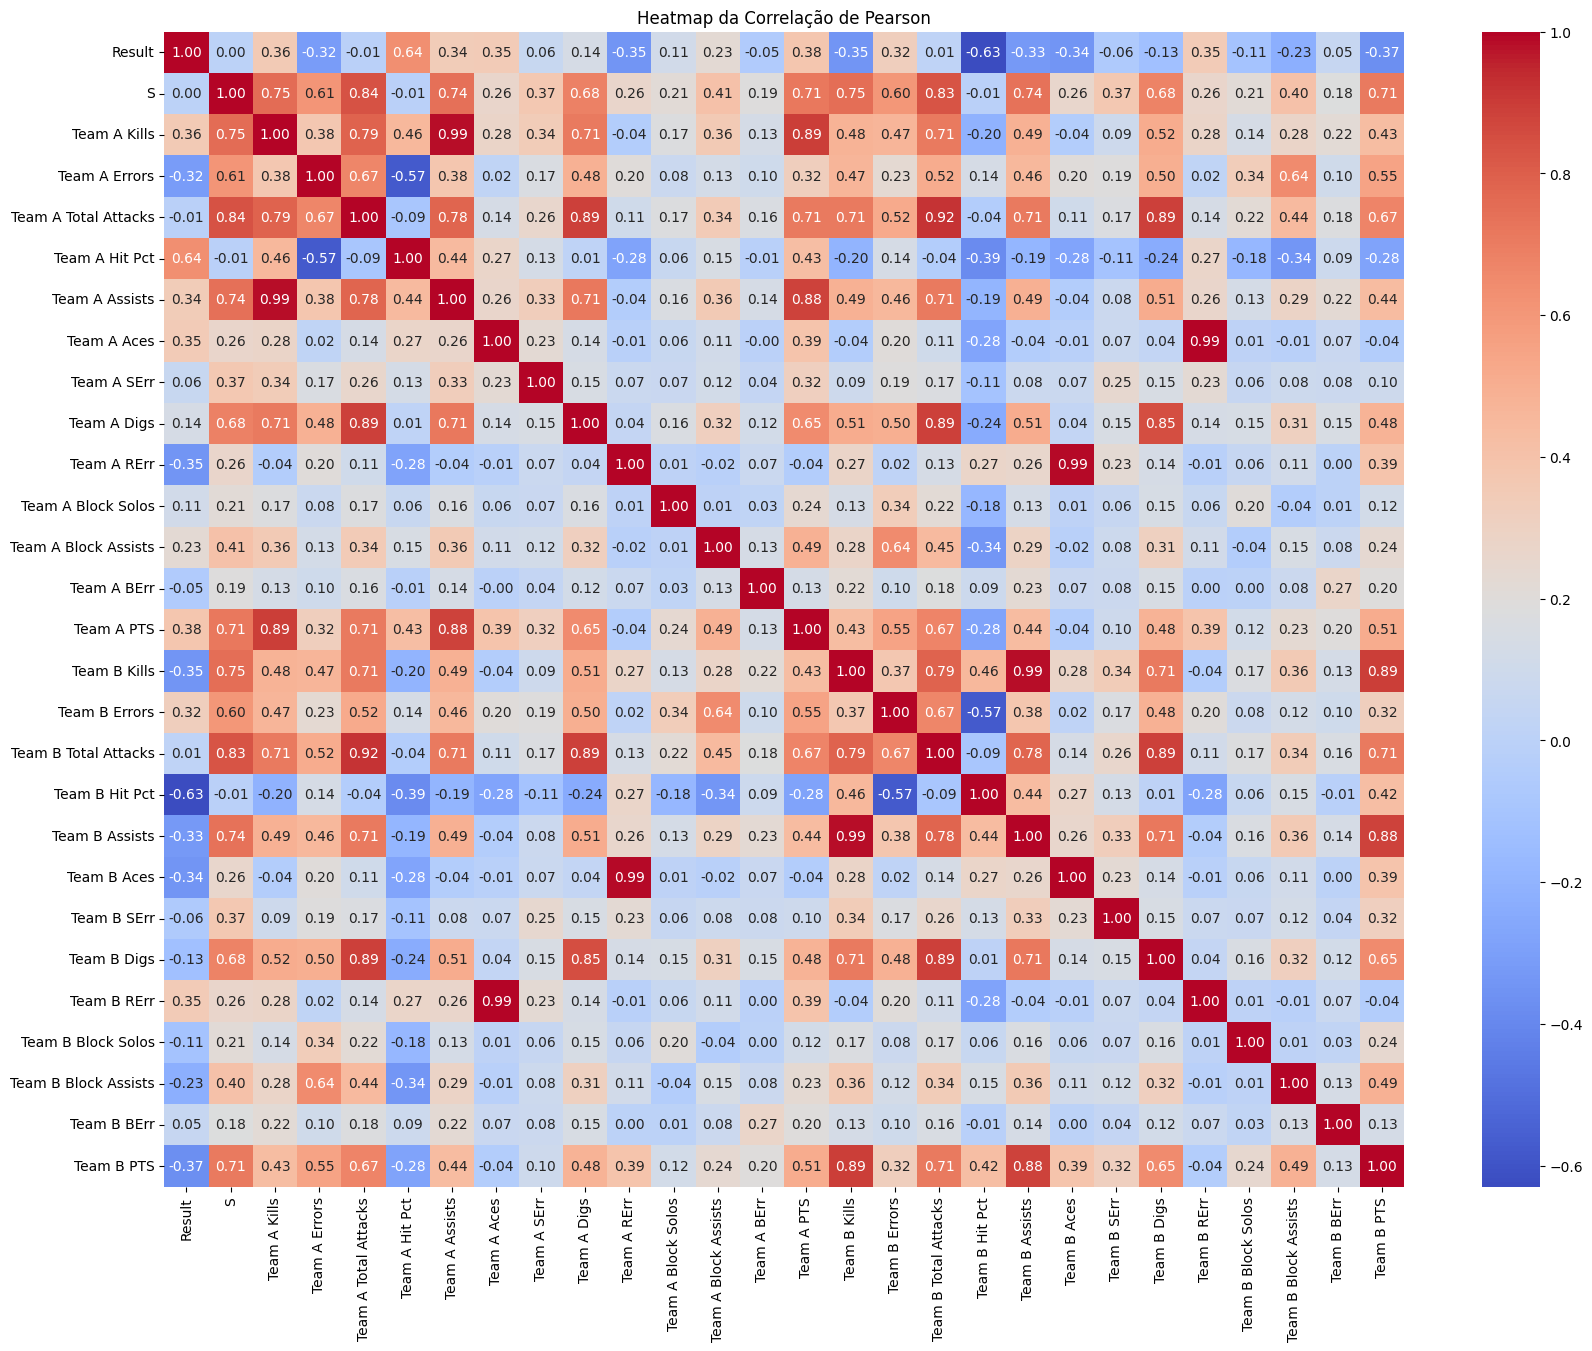

### **Verificando Distribuição dos Dados em Relação a Normal**

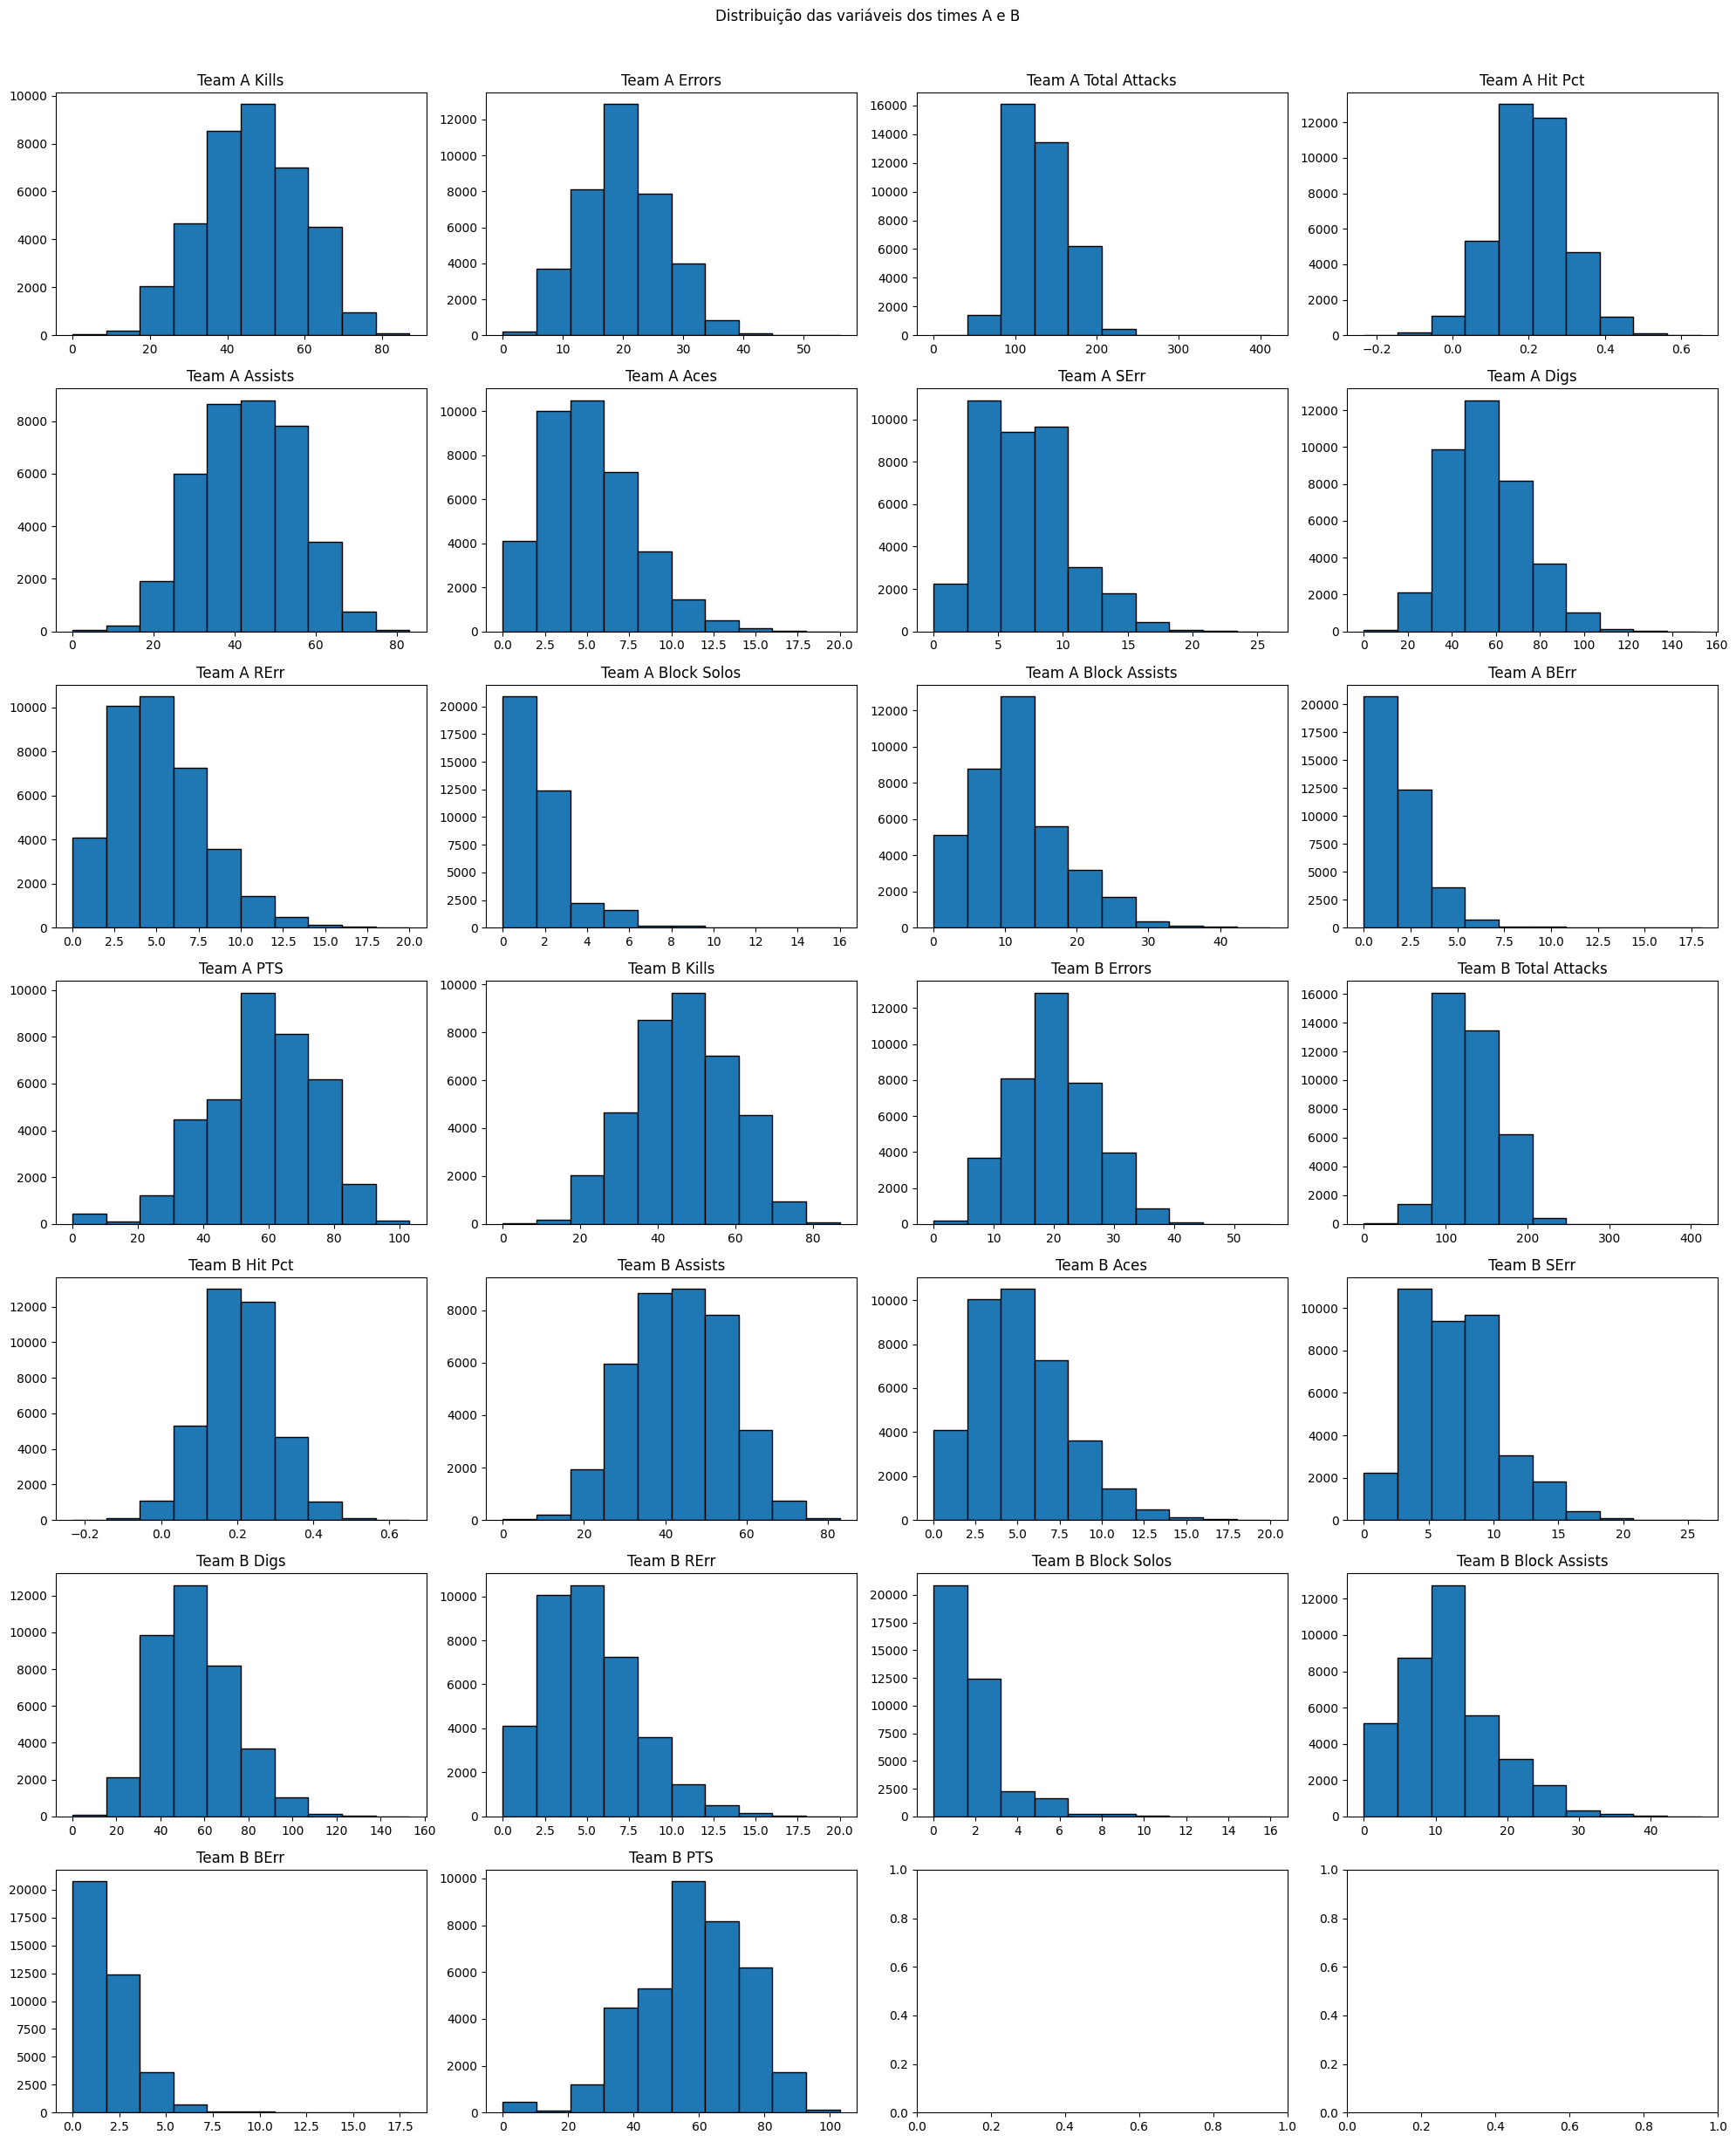

In [20]:
fig, axs = plt.subplots(7, 4, figsize=(20, 25))
fig.suptitle('Distribuição das variáveis dos times A e B')

colunas = df.columns

colunas_verify = [ 'Team A Kills',
       'Team A Errors', 'Team A Total Attacks', 'Team A Hit Pct',
       'Team A Assists', 'Team A Aces', 'Team A SErr', 'Team A Digs',
       'Team A RErr', 'Team A Block Solos', 'Team A Block Assists',
       'Team A BErr', 'Team A PTS', 'Team B Kills', 'Team B Errors',
       'Team B Total Attacks', 'Team B Hit Pct', 'Team B Assists',
       'Team B Aces', 'Team B SErr', 'Team B Digs', 'Team B RErr',
       'Team B Block Solos', 'Team B Block Assists', 'Team B BErr',
       'Team B PTS']

axs = axs.ravel()

for i, col in enumerate(colunas_verify):
    axs[i].hist(df[col], bins=10, edgecolor='black')
    axs[i].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [21]:
scaler = MinMaxScaler()
df_norm = df
df_norm[colunas_verify] = scaler.fit_transform(df[colunas_verify])
df_norm


,Date,TeamA,TeamB,Result,S,Team A Kills,Team A Errors,Team A Total Attacks,Team A Hit Pct,Team A Assists,...,Team B SErr,Team B Digs,Team B RErr,Team B Block Solos,Team B Block Assists,Team B BErr,Team B PTS,TeamA_ID,TeamB_ID,Match_ID
0,2019-08-30,USC Upstate,Virginia Tech,0,4.0,0.379310,0.375000,0.271845,0.384181,0.361446,...,0.461538,0.333333,0.20,0.2500,0.425532,0.111111,0.000000,112,161,439062673874810252
1,2019-08-30,USC Upstate,Northwestern,0,3.0,0.183908,0.428571,0.216019,0.161582,0.180723,...,0.269231,0.274510,0.05,0.1250,0.425532,0.000000,0.000000,112,148,-6393553290252646712
2,2019-09-07,USC Upstate,Ga. Southern,0,3.0,0.425287,0.357143,0.283981,0.427119,0.421687,...,0.192308,0.320261,0.10,0.0625,0.127660,0.055556,0.485437,112,113,-5733062911694560798
3,2019-09-13,USC Upstate,Norfolk St.,1,5.0,0.574713,0.482143,0.398058,0.421469,0.566265,...,0.576923,0.437908,0.45,0.0625,0.361702,0.055556,0.684466,112,114,-5868856819160208546
4,2019-09-14,USC Upstate,George Washington,0,3.0,0.344828,0.303571,0.271845,0.394350,0.361446,...,0.038462,0.392157,0.10,0.0625,0.127660,0.333333,0.504854,112,204,8830924500397907685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37645,2016-11-01,Elon,N.C. Central,1,3.0,0.597701,0.250000,0.257282,0.667797,0.602410,...,0.153846,0.215686,0.20,0.0625,0.127660,0.277778,0.310680,8,302,5799366477152449121
37646,2016-11-05,Elon,Col. of Charleston,0,3.0,0.448276,0.375000,0.303398,0.425989,0.421687,...,0.153846,0.398693,0.35,0.1250,0.170213,0.222222,0.533981,8,200,-2175868549993111147
37647,2016-11-07,Elon,UNCW,0,3.0,0.505747,0.500000,0.317961,0.401130,0.481928,...,0.038462,0.313725,0.05,0.1250,0.361702,0.111111,0.480583,8,233,-6645557368386443310
37648,2016-11-11,Elon,Hofstra,0,5.0,0.563218,0.660714,0.378641,0.350282,0.542169,...,0.653846,0.352941,0.20,0.1250,0.297872,0.000000,0.679612,8,206,-2791904053078817741


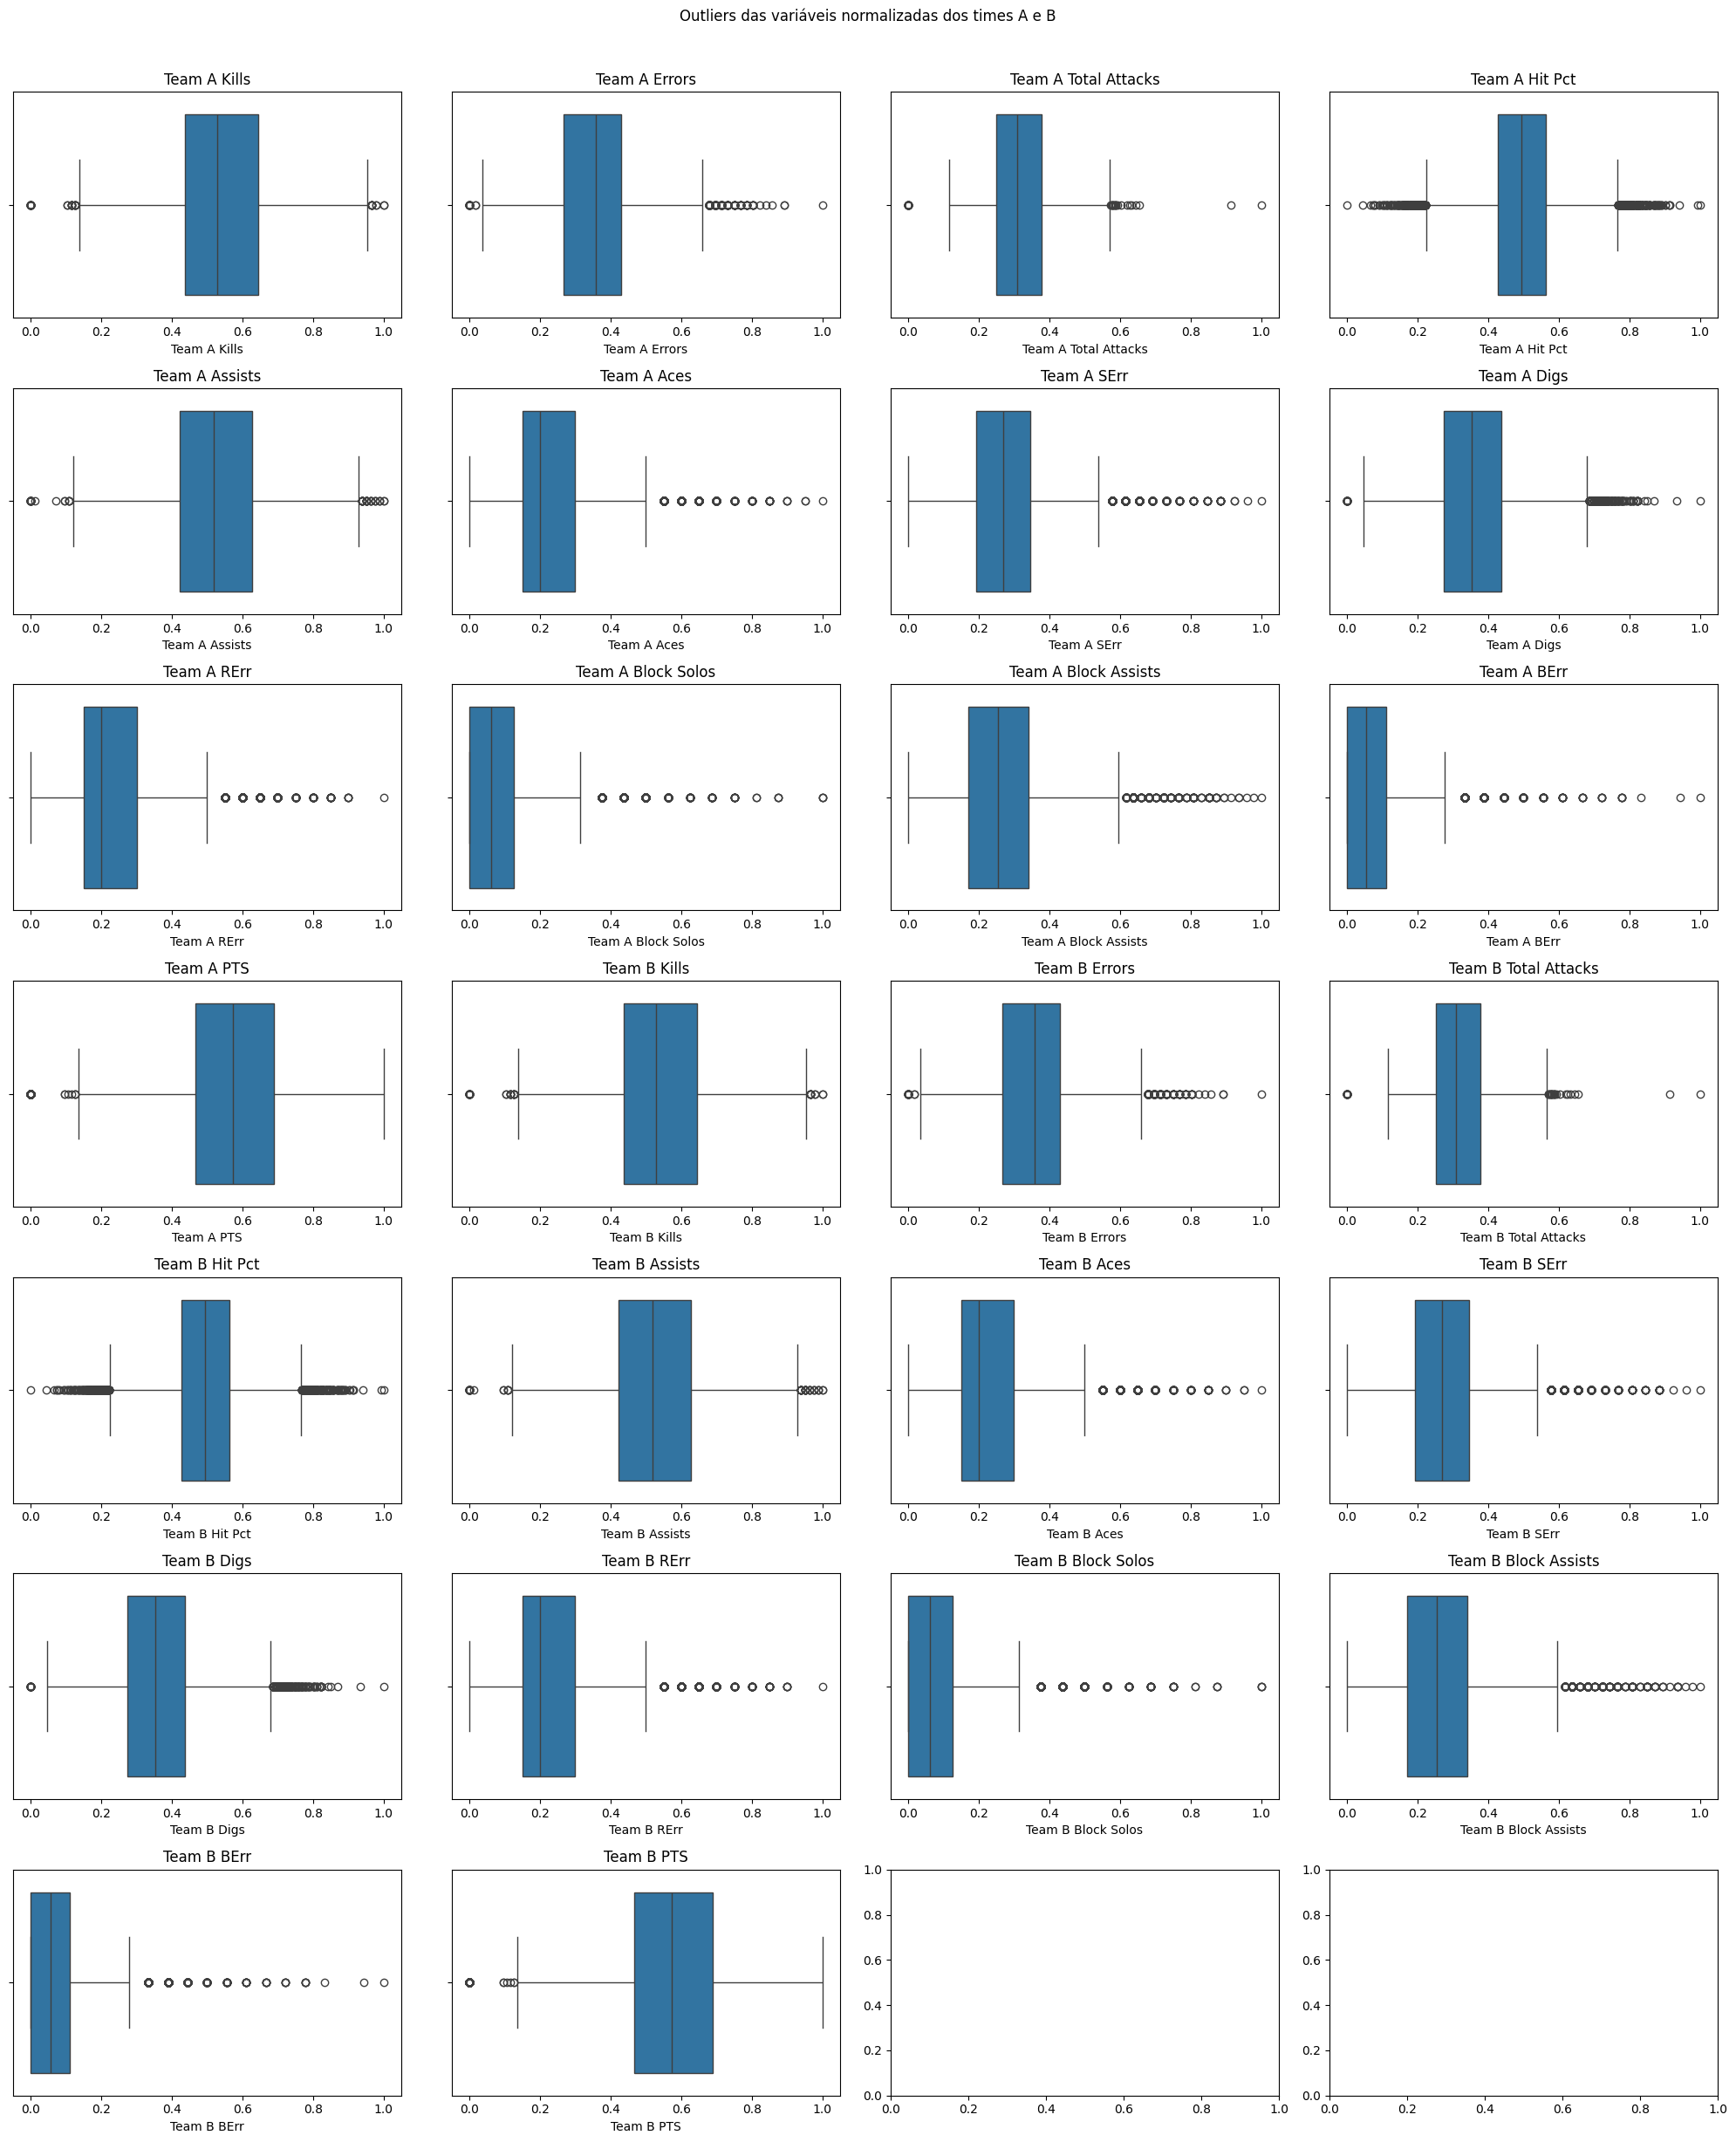

In [14]:
fig, axs = plt.subplots(7, 4, figsize=(20, 25))
fig.suptitle('Outliers das variáveis normalizadas dos times A e B')

axs = axs.ravel()

for i, col in enumerate(colunas_verify):
    sns.boxplot(data=df, x=col, ax=axs[i])
    axs[i].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [22]:
from scipy import stats

z_scores = stats.zscore(df[colunas_verify])
df_norm_clean = df[(abs(z_scores) < 3).all(axis=1)]
df_norm_clean

,Date,TeamA,TeamB,Result,S,Team A Kills,Team A Errors,Team A Total Attacks,Team A Hit Pct,Team A Assists,...,Team B SErr,Team B Digs,Team B RErr,Team B Block Solos,Team B Block Assists,Team B BErr,Team B PTS,TeamA_ID,TeamB_ID,Match_ID
2,2019-09-07,USC Upstate,Ga. Southern,0,3.0,0.425287,0.357143,0.283981,0.427119,0.421687,...,0.192308,0.320261,0.10,0.0625,0.127660,0.055556,0.485437,112,113,-5733062911694560798
3,2019-09-13,USC Upstate,Norfolk St.,1,5.0,0.574713,0.482143,0.398058,0.421469,0.566265,...,0.576923,0.437908,0.45,0.0625,0.361702,0.055556,0.684466,112,114,-5868856819160208546
4,2019-09-14,USC Upstate,George Washington,0,3.0,0.344828,0.303571,0.271845,0.394350,0.361446,...,0.038462,0.392157,0.10,0.0625,0.127660,0.333333,0.504854,112,204,8830924500397907685
5,2019-09-14,USC Upstate,East Carolina,0,5.0,0.666667,0.392857,0.407767,0.505085,0.686747,...,0.192308,0.496732,0.30,0.1250,0.170213,0.222222,0.815534,112,121,8631148851651591213
6,2019-09-17,USC Upstate,N.C. A&T,1,4.0,0.655172,0.303571,0.313107,0.613559,0.602410,...,0.615385,0.307190,0.15,0.1250,0.234043,0.000000,0.684466,112,274,4932335310276499937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37644,2016-10-30,Elon,Delaware,0,4.0,0.609195,0.392857,0.359223,0.499435,0.626506,...,0.230769,0.424837,0.20,0.0625,0.212766,0.055556,0.679612,8,70,-6541874236428777895
37645,2016-11-01,Elon,N.C. Central,1,3.0,0.597701,0.250000,0.257282,0.667797,0.602410,...,0.153846,0.215686,0.20,0.0625,0.127660,0.277778,0.310680,8,302,5799366477152449121
37646,2016-11-05,Elon,Col. of Charleston,0,3.0,0.448276,0.375000,0.303398,0.425989,0.421687,...,0.153846,0.398693,0.35,0.1250,0.170213,0.222222,0.533981,8,200,-2175868549993111147
37647,2016-11-07,Elon,UNCW,0,3.0,0.505747,0.500000,0.317961,0.401130,0.481928,...,0.038462,0.313725,0.05,0.1250,0.361702,0.111111,0.480583,8,233,-6645557368386443310


## **Divisão de Features**
Como não temos nenhum especialista no domínio, dividi as features em categorias de acordo com vozes da minha cabeça e com aquela apresentação de estatísticas de volei que está na sessão de explicação das features

OBS: Estou analisando aqui ainda, quais colunas do time B por
**Gerais**
* Date
* Team A/ID
* Team B/ID
* Result
* S
* Match ID

**Ataque**
* Team A Kills: Número de ataques que resultaram em pontos
* Team A Errors: Erros de ataque cometidos
* Team A Total Attacks: Total de ataques realizados
* Team A Hit Pct: Percentual de acerto no ataque
* Team A Assists: Assistências para ataque

**Saque**
* Team A Aces: Pontos diretos de saque
* Team A SErr: Erros de saque

**Defesa**
* Team A Digs: Defesas bem-sucedidas
* Team A RErr: Erros de recepção

**Bloqueio**
* Team A Block Solos: Bloqueios individuais
* Team A Block Assists: Assistências em bloqueios
* Team A BErr: Erros de bloqueio

### **Dividindo Dataframe pelas categorias**

In [23]:
# Ataque
colunas_atq = [ 'Team A Kills',
       'Team A Errors', 'Team A Total Attacks', 'Team A Hit Pct',
       'Team A Assists']
df_atq = df_norm_clean[colunas_atq]

colunas_saq = ['Team A Aces', 'Team A SErr']
df_saq = df_norm_clean[colunas_saq]

colunas_def = ['Team A Digs', 'Team A RErr']
df_def = df_norm_clean [colunas_def]

colunas_bloq = ['Team A Block Solos', 'Team A Block Assists', 'Team A BErr']
df_bloq = df_norm_clean [colunas_bloq]

In [28]:
df_atq.head()

,Team A Kills,Team A Errors,Team A Total Attacks,Team A Hit Pct,Team A Assists
2,0.425287,0.357143,0.283981,0.427119,0.421687
3,0.574713,0.482143,0.398058,0.421469,0.566265
4,0.344828,0.303571,0.271845,0.394350,0.361446
5,0.666667,0.392857,0.407767,0.505085,0.686747
6,0.655172,0.303571,0.313107,0.613559,0.602410


In [29]:
df_saq.head()

,Team A Aces,Team A SErr
2,0.10,0.153846
3,0.45,0.230769
4,0.10,0.230769
5,0.30,0.230769
6,0.15,0.384615


In [30]:
df_def.head()

,Team A Digs,Team A RErr
2,0.313725,0.20
3,0.496732,0.55
4,0.274510,0.15
5,0.418301,0.40
6,0.352941,0.40


In [31]:
df_bloq.head()

,Team A Block Solos,Team A Block Assists,Team A BErr
2,0.2500,0.042553,0.111111
3,0.1250,0.425532,0.000000
4,0.0000,0.255319,0.000000
5,0.0625,0.276596,0.055556
6,0.0000,0.425532,0.000000


### **Teste Preliminar: KMeans**
Testei inicialmente, fazer semelhante ao que fizeram no artigo de base de rodas os testes do kmenas com n até no máximo o valor total de features daquela categoria. Mas os resultados deram péssimos, então testei 10 clusters só por desencargo de consciência

In [81]:
def kmeans_categoria(df):
    range_n_clusters = range(2,11)
    silhouette = []
    davies_bouldin = []

    for n_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters = n_clusters, n_init = 100 ,random_state = 42)
        kmeans.fit(df)
        labels = kmeans.labels_
        silhouette.append((n_clusters,silhouette_score(df, labels)))
        davies_bouldin.append((n_clusters,davies_bouldin_score(df,labels)))

    return davies_bouldin, silhouette

#### **KMeans para Ataque**

In [82]:
db_atq, sl_atq = kmeans_categoria(df_atq)
atq = {'Categoria': 'Ataque','Silhouette-Score':sl_atq,'Davies-Bouldin-Score':db_atq}
atq

{'Categoria': 'Ataque',
 'Silhouette-Score': [(2, 0.40341149154035966),
  (3, 0.3967991417413975),
  (4, 0.36519226100343816),
  (5, 0.34280199576717024),
  (6, 0.3123922251937403),
  (7, 0.30094332917941813),
  (8, 0.2968985995915263),
  (9, 0.2775440980572002),
  (10, 0.27340205132426043)],
 'Davies-Bouldin-Score': [(2, 0.9506045810461665),
  (3, 0.870073876794622),
  (4, 0.9327669552630533),
  (5, 0.9443665425323295),
  (6, 0.9766482996891686),
  (7, 0.9726800260520526),
  (8, 0.9432580141543192),
  (9, 1.0145253905180103),
  (10, 1.0330185545136858)]}

#### **KMeans para Bloqueio**

In [83]:
db_bloq, sl_bloq = kmeans_categoria(df_bloq)
bloq = {'Categoria': 'Bloqueio','Silhouette-Score':sl_bloq,'Davies-Bouldin-Score':db_bloq}
bloq

{'Categoria': 'Bloqueio',
 'Silhouette-Score': [(2, 0.33521116886471736),
  (3, 0.2946463001765076),
  (4, 0.26217118088028685),
  (5, 0.2783766023432965),
  (6, 0.2822949460837904),
  (7, 0.25569592716399575),
  (8, 0.26327671625566823),
  (9, 0.25648825887859183),
  (10, 0.2639429257336915)],
 'Davies-Bouldin-Score': [(2, 1.1790229115716555),
  (3, 1.2542246227410503),
  (4, 1.212043238941088),
  (5, 1.0515495620867403),
  (6, 1.067421629207177),
  (7, 1.132448123623471),
  (8, 1.0885420895141884),
  (9, 1.0834506455286388),
  (10, 1.0626089557485723)]}

#### **KMeans para Defesa**

In [47]:
db_def, sl_def = kmeans_categoria(df_def)
de = {'Categoria': 'Defesa','Silhouette-Score':sl_def,'Davies-Bouldin-Score':db_def}
de

[(2, 1.11305843042436)]

#### **KMeans para Saque**

In [49]:
db_saq, sl_saq = kmeans_categoria(df_saq)
saq = {'Categoria': 'Saque','Silhouette-Score':sl_saq,'Davies-Bouldin-Score':db_saq}
saq

[(2, 1.0806432660659742)]

#### **Análise de Resultados**

In [85]:
dados = []
casos = [saq,de,atq,bloq]

for caso in casos:
    for sl_tupla, db_tupla in zip(caso['Silhouette-Score'], caso['Davies-Bouldin-Score']):
        n_clusters = sl_tupla[0]
        sl_score = sl_tupla[1]
        db_score = db_tupla[1]
        

        dados.append({
            'Categoria': caso['Categoria'],
            'n clusters': n_clusters,
            'Silhouette Score': sl_score,
            'Davies-Bouldin Score': db_score
        })
resultados = pd.DataFrame(dados)

resultados

,Categoria,n clusters,Silhouette Score,Davies-Bouldin Score
0,Saque,2,0.369565,1.080643
1,Defesa,2,0.364713,1.113058
2,Ataque,2,0.403411,0.950605
3,Ataque,3,0.396799,0.870074
4,Ataque,4,0.365192,0.932767
5,Ataque,5,0.342802,0.944367
6,Ataque,6,0.312392,0.976648
7,Ataque,7,0.300943,0.972680
8,Ataque,8,0.296899,0.943258
9,Ataque,9,0.277544,1.014525


### **Conclusões**

resultados de merda 👍